In [16]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy              as np
import plotly.express       as px
import pydotplus         as pdp
import seaborn as sns

In [17]:
import chardet

with open('data.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [18]:
# link https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download

df = pd.read_csv('data.csv', encoding= 'Windows-1252')
df.shape

(9994, 21)

In [19]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Missing values

In [20]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Data Types and Additional Columnns

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format= '%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format= '%m/%d/%Y')
df['Ship Days'] = df['Ship Date'] - df['Order Date']
df['Ship Days'] = df['Ship Days'].dt.days

### Duplicated Rows

In [23]:
df.duplicated().sum()

0

### Unique Values

In [24]:
df_ = pd.DataFrame({'columns': df.columns, 'n_unique': [df[col].nunique() for col in df.columns]})
df_ = df_.sort_values(by='n_unique', ascending=True)
df_

,columns,n_unique
8,Country,1
14,Category,3
7,Segment,3
4,Ship Mode,4
12,Region,4
21,Ship Days,8
19,Discount,12
18,Quantity,14
15,Sub-Category,17
10,State,49


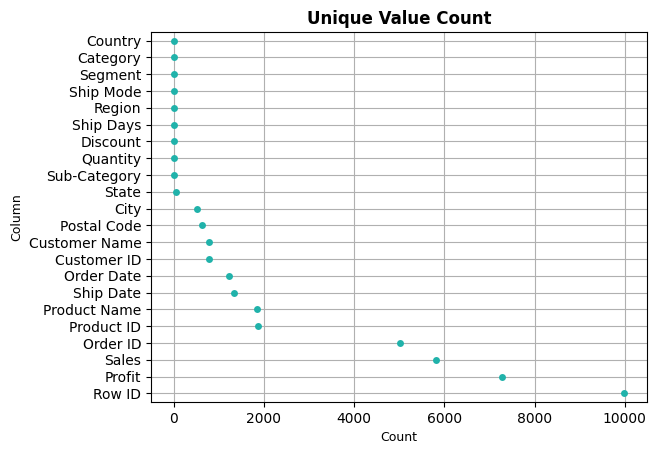

In [25]:
cols = ['Row ID', 'Order ID', 'Order Date', 'Ship Date','Customer ID', 'Customer Name','City',
       'Postal Code', 'Product ID','Product Name']
df_ = pd.DataFrame({'column': df.columns, 'n_unique': [df[col].nunique() for col in df.columns]}).sort_values(by='n_unique', ascending= True)

sns.stripplot(df_, y='column', x='n_unique', color='LightSeaGreen')
plt.xlabel('Count', size=9)
plt.ylabel('Column',size=9)
plt.grid(True)
plt.title('Unique Value Count', weight='bold')
plt.show()

Outliers

In [26]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Ship Days'],
      dtype='object')

In [27]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

n = df.shape[0]
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    below_lower = df[df[col] < lower]
    above_upper = df[df[col] > upper]
    print(f'\n======= {col} =======')
    print(f'Lower Outlier: {below_lower.shape[0]} '
          f'({below_lower.shape[0] / n * 100:.2f}%)')
    print(f'Upper Outlier: {above_upper.shape[0]} '
          f'({above_upper.shape[0] / n * 100:.2f}%)')


======= Sales =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 1167 (11.68%)

======= Quantity =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 170 (1.70%)

======= Discount =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 856 (8.57%)

======= Profit =======
Lower Outlier: 604 (6.04%)
Upper Outlier: 1277 (12.78%)


Mặc dù tồn tại một tỷ lệ đáng kể các upper outliers trong biến Sales, phân phối của các đơn hàng giá trị cao này nhìn chung tương đồng với toàn bộ dữ liệu theo hầu hết các chiều phân tích như Ship Mode, Segment, Region và Ship Days.
Sự khác biệt chủ yếu xuất hiện ở cấp độ Sub-Category, cho thấy các outliers phản ánh đặc điểm mua hàng theo từng nhóm sản phẩm hơn là các giá trị bất thường hay lỗi dữ liệu.

Although a relatively high proportion of upper outliers is observed across several sub-categories (ranging from ~5% to ~28%), these values reflect genuine purchasing behavior rather than data anomalies.
The absence of lower outliers and the systematic variation across product categories suggest that high-value orders are driven by bulk purchases or high-priced items. Therefore, the outliers were retained for further analysis.

### Duplicated Rows

In [28]:
print(f'Duplicated rows: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Duplicated rows eliminated')

Duplicated rows: 0
Duplicated rows eliminated


### Drop and Rename Columns

In [29]:
df.drop(['Row ID', 'Country', 'Postal Code'], axis= 1, inplace=True)
df.shape

(9994, 19)

In [30]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Ship Days'],
      dtype='object')

In [31]:
df.columns = ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name','segment', 
              'city', 'state', 'region', 'product_id', 'category', 'sub_category', 'product_name', 
              'sales', 'quantity', 'discount', 'profit', 'ship_days']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   ship_mode      9994 non-null   object        
 4   customer_id    9994 non-null   object        
 5   customer_name  9994 non-null   object        
 6   segment        9994 non-null   object        
 7   city           9994 non-null   object        
 8   state          9994 non-null   object        
 9   region         9994 non-null   object        
 10  product_id     9994 non-null   object        
 11  category       9994 non-null   object        
 12  sub_category   9994 non-null   object        
 13  product_name   9994 non-null   object        
 14  sales          9994 non-null   float64       
 15  quantity       9994 n

### Database

In [32]:
# customers = (
#     df[['customer_id', 'customer_name', 'segment', 'city', 'state', 'region']]
#     .drop_duplicates(subset='customer_id')
# )
# products = (
#     df[['product_id', 'category', 'sub_category', 'product_name']]
#     .drop_duplicates(subset='product_id')
# )
# orders = (
#     df[['order_id', 'order_date', 'customer_id', 'ship_date', 'ship_mode']]
#     .drop_duplicates(subset='order_id')
# )
# order_items = (
#     df[['order_id', 'product_id', 'total']]
#     .copy()
# )


In [33]:
# import sqlite3

# conn = sqlite3.connect('superstore.db')
# customers.to_sql('customers', conn, if_exists='replace', index=False)
# orders.to_sql('orders', conn, if_exists='replace', index=False)
# order_items.to_sql('order_items', conn, if_exists='replace', index=False)
# products.to_sql('products', conn, if_exists='replace', index=False)


In [34]:
# cursor = conn.cursor()

# cursor.execute("CREATE INDEX idx_orders_customer ON orders(customer_id)")
# cursor.execute("CREATE INDEX idx_order_items_order ON order_items(order_id)")
# cursor.execute("CREATE INDEX idx_order_items_product ON order_items(product_id)")
# cursor.execute("CREATE INDEX idx_customers_customer ON customers(customer_id)")
# cursor.execute("CREATE INDEX idx_products_product ON products(product_id)")

# conn.commit()


### EDA

### Numerical Columns

#### Distribution

In [35]:
num_cols = ['sales', 'quantity', 'discount', 'profit']

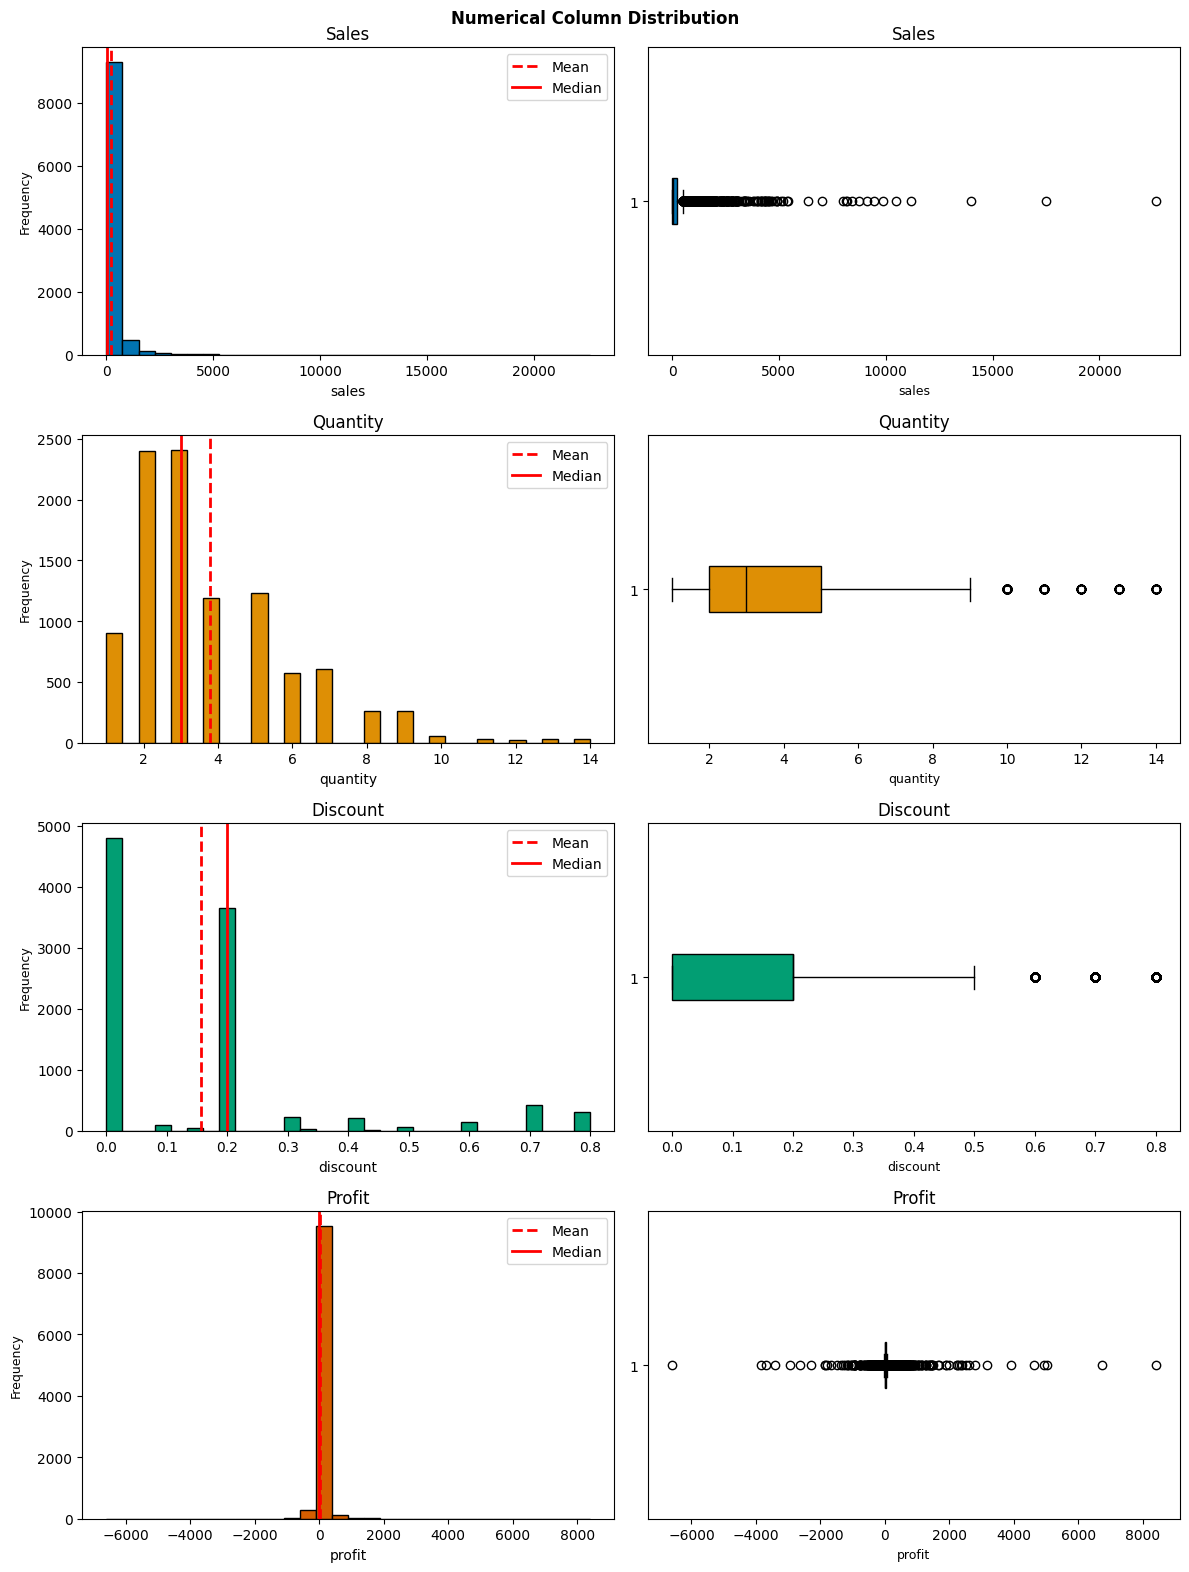

In [36]:
cols = ['sales', 'quantity', 'discount', 'profit']

palette = sns.color_palette("colorblind", n_colors=len(cols))

fig, axes = plt.subplots(
    nrows=len(cols),
    ncols=2,
    figsize=(12, 4 * len(cols))
)

for i, col in enumerate(cols):
    color = palette[i]

    # Histogram 
    axes[i, 0].hist(df[col], bins=30, color=color, edgecolor='black')
    axes[i, 0].set_title(f'{col}'.capitalize())
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency', size=9)
    axes[i, 0].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[i, 0].axvline(df[col].median(), color='red', linestyle='-', linewidth=2, label='Median')
    axes[i, 0].legend()

    # Boxplot 
    axes[i, 1].boxplot(
        df[col],
        patch_artist=True,
        boxprops=dict(facecolor=color),
        vert= False,
        medianprops=dict(color='Black')
    )
    axes[i, 1].set_title(f'{col}'.capitalize())
    axes[i, 1].set_xlabel(col, size=9)

plt.suptitle('Numerical Column Distribution', weight='bold')
plt.tight_layout()
plt.show()

#### Skewness

In [37]:
df_ = df[cols].skew().reset_index()
df_.columns = ['variable', 'skewness']
df_


,variable,skewness
0,sales,12.972752
1,quantity,1.278545
2,discount,1.684295
3,profit,7.561432


### Categorical Column Distributions

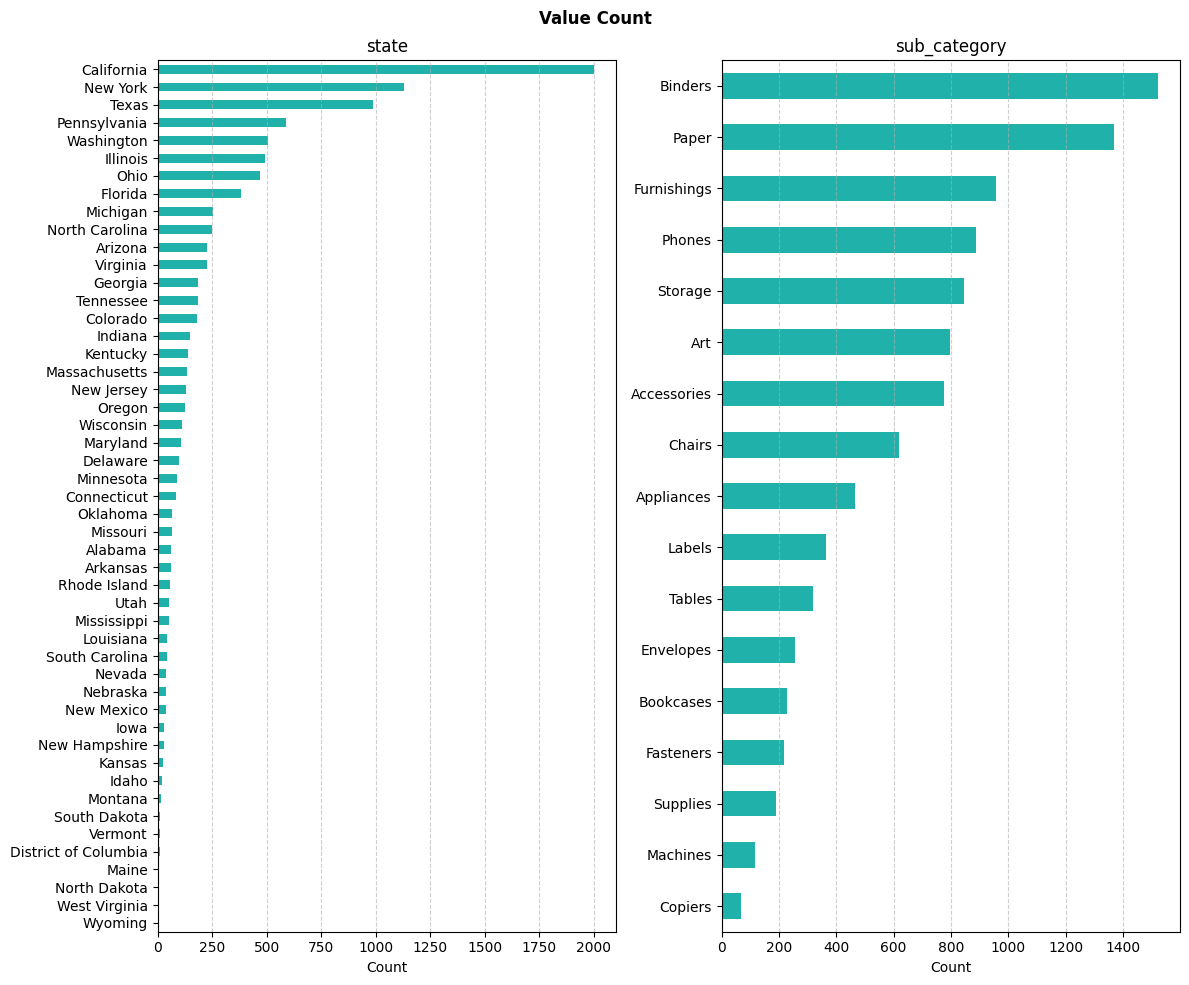

In [38]:
cols = ['state', 'sub_category']

fig, axes = plt.subplots(1, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    df[col].value_counts().sort_values().plot(
        kind='barh', ax=ax, color= 'LightSeaGreen'
    )
    ax.set_title(col)
    ax.set_xlabel("Count")
    ax.set_ylabel("")
    ax.grid(axis='x', linestyle='--', alpha=0.6)

fig.suptitle('Value Count', weight='bold')
plt.tight_layout()
plt.show()

In [39]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'ship_days'],
      dtype='object')

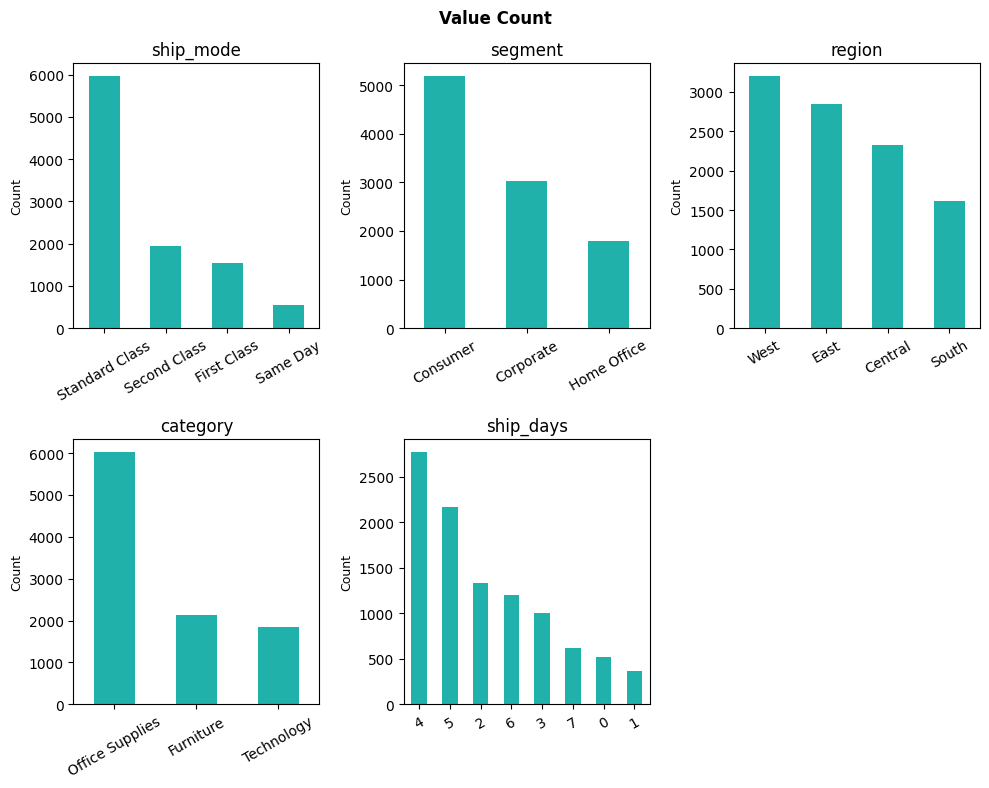

In [40]:
cols = ['ship_mode', 'segment', 'region', 'category', 'ship_days']

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    df[col].value_counts().plot(kind='bar', ax=ax, color='LightSeaGreen')
    ax.set_title(col)
    ax.set_ylabel("Count", size=9)
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=30)

for ax in axes[len(cols):]:
    ax.set_visible(False)

fig.suptitle('Value Count', weight= 'bold')
plt.tight_layout()
plt.show()


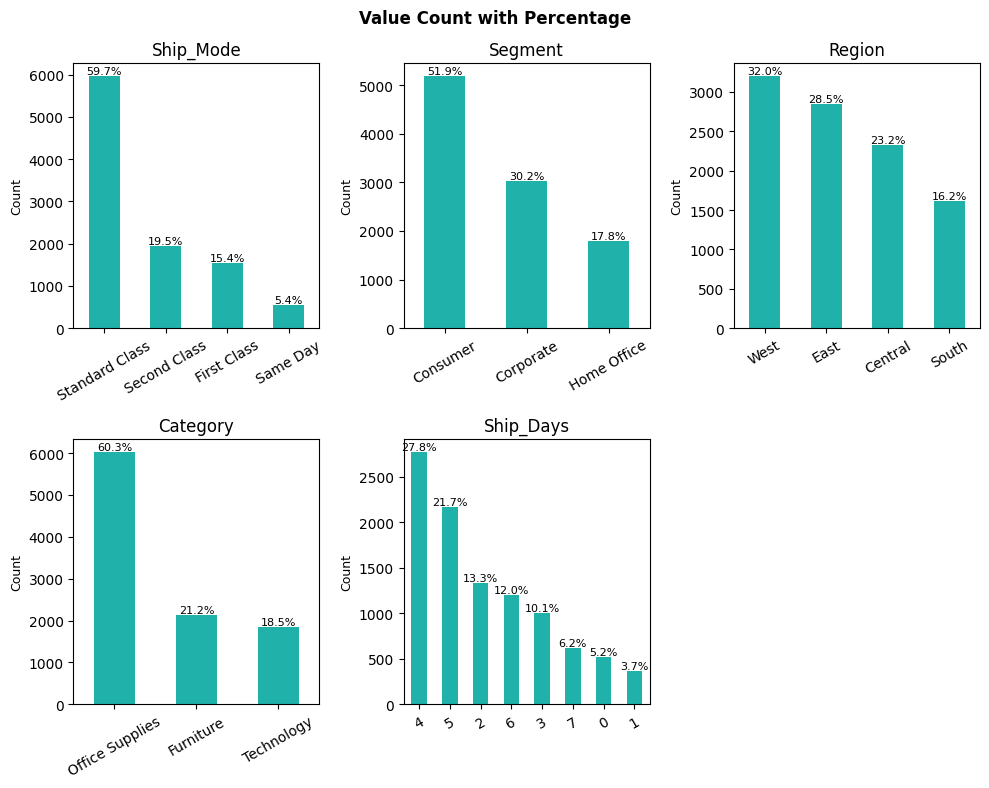

In [41]:
cols = ['ship_mode', 'segment', 'region', 'category', 'ship_days']

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    vc = df[col].value_counts()
    total = vc.sum()

    vc.plot(kind='bar', ax=ax, color='LightSeaGreen')

    for i, v in enumerate(vc.values):
        pct = v / total * 100
        ax.text(i, v, f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

    ax.set_title(col.title())
    ax.set_ylabel("Count", size=9)
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=30)

# Ẩn subplot dư
for ax in axes[len(cols):]:
    ax.set_visible(False)

fig.suptitle('Value Count with Percentage', weight='bold')
plt.tight_layout()
plt.show()


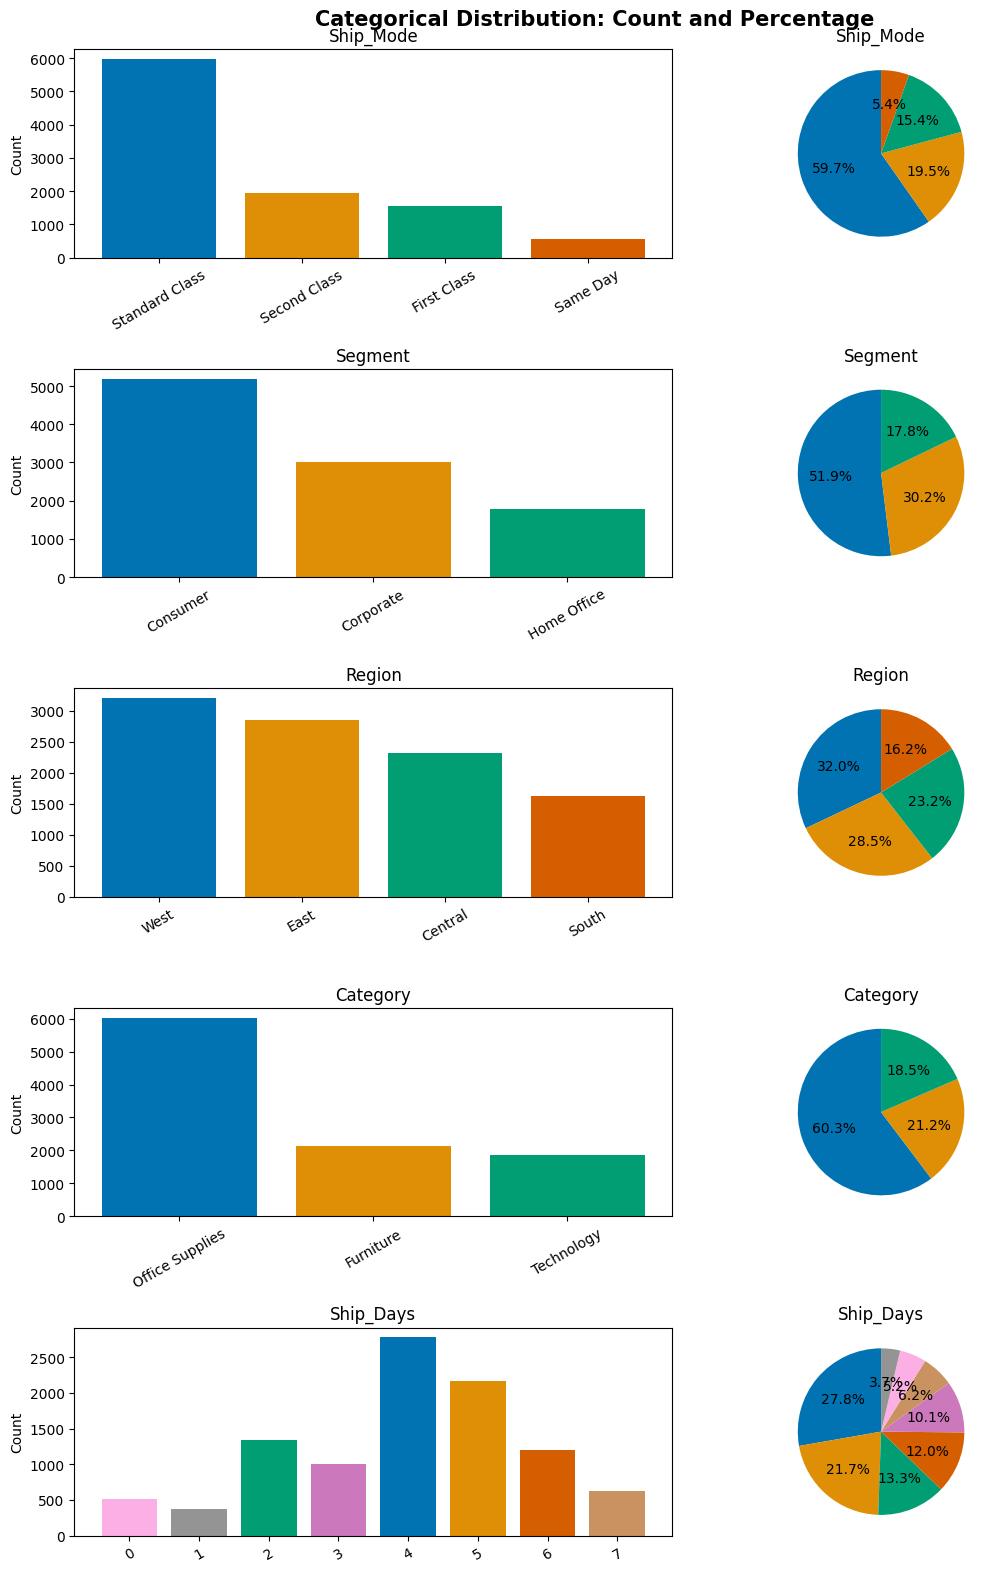

In [ ]:
cols = ['ship_mode', 'segment', 'region', 'category', 'ship_days']

palette = sns.color_palette("colorblind")

fig, axes = plt.subplots(
    nrows=len(cols),
    ncols=2,
    figsize=(12, 3.2 * len(cols))
)

for i, col in enumerate(cols):
    vc = df[col].value_counts()
    pct = vc / vc.sum() * 100

    colors = palette[:len(vc)]

    # LEFT: Vertical bar (Count)
    axes[i, 0].bar(vc.index, vc.values, color=colors)
    axes[i, 0].set_title(f'{col.title()}')
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].tick_params(axis='x', rotation=30)

    # RIGHT: Pie chart (Percentage)
    axes[i, 1].pie(
        pct.values,
        autopct='%1.1f%%', 
        startangle=90,
        colors=colors
    )
    axes[i, 1].set_title(f'{col.title()}')

fig.suptitle(
    'Categorical Distribution: Count and Percentage',
    fontsize=15,
    weight='bold'
)

plt.tight_layout()
plt.show()


### Product Analysis

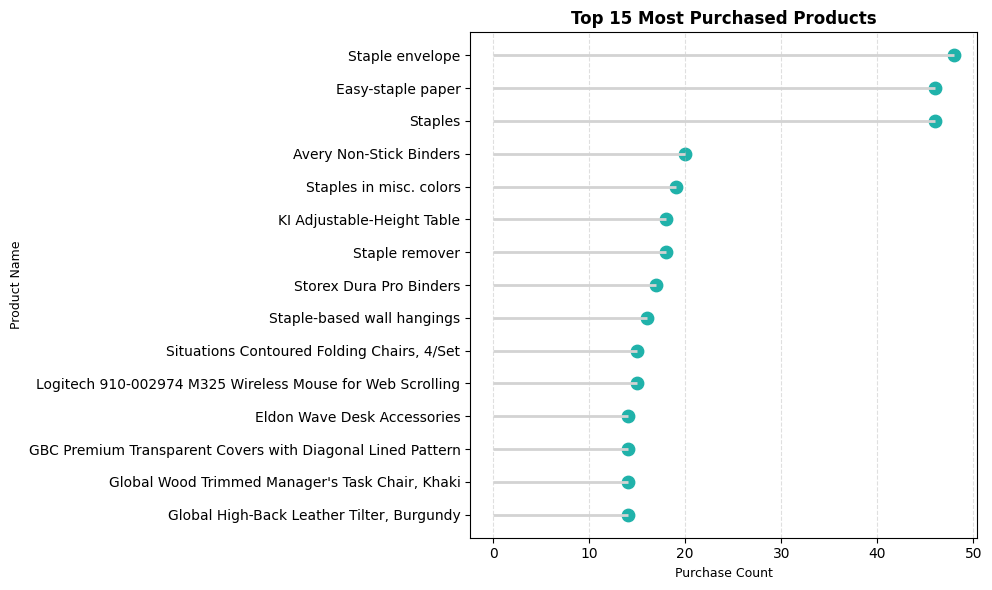

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

df_ = df['product_name'].value_counts().reset_index()
df_.columns = ['product_name', 'count']
df_ = df_.head(15).sort_values('count') 

plt.figure(figsize=(10, 6))


plt.hlines(
    y=df_['product_name'],
    xmin=0,
    xmax=df_['count'],
    color='lightgray',
    linewidth=2
)


plt.scatter(
    df_['count'],
    df_['product_name'],
    color='LightSeaGreen',
    s=80
)

plt.xlabel('Purchase Count', size=9)
plt.ylabel('Product Name', size=9)
plt.title('Top 15 Most Purchased Products', weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_19852\72794882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


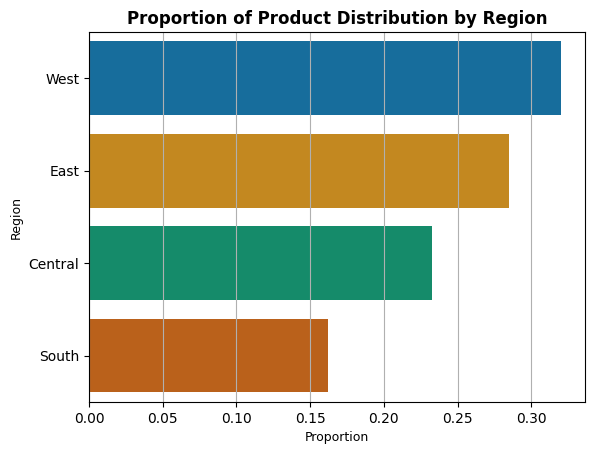

In [44]:
df_ = df['region'].value_counts(normalize=True)
sns.barplot(
    x=df_.values,
    y=df_.index,
    orient='h',
    palette='colorblind')
plt.ylabel('Region', size=9)
plt.xlabel('Proportion', size=9)
plt.grid(axis='x')
plt.title("Proportion of Product Distribution by Region", weight='bold')
plt.show()

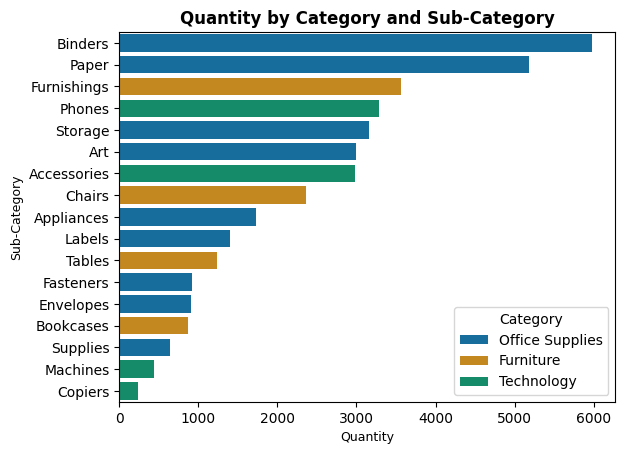

In [45]:
df_ = df.groupby(['category', 'sub_category'])['quantity'].sum().reset_index(name='sum').sort_values(by='sum', ascending=False)

sns.barplot(df_, y='sub_category', x='sum', hue='category', palette='colorblind')
plt.tick_params(axis='x', rotation= 0)
plt.title('Quantity by Category and Sub-Category', weight = 'bold')
plt.xlabel('Quantity', size=9)
plt.ylabel('Sub-Category', size=9)
plt.legend(title= 'Category')
plt.show()

#### Apriori


In [46]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [47]:
df_ap = df[['order_id', 'sub_category']]

order_size = df_ap.groupby('order_id')['sub_category'].nunique()
valid_orders = order_size[order_size >= 2].index
df_ap = df_ap[df_ap['order_id'].isin(valid_orders)]
df_ap


,order_id,sub_category
0,CA-2016-152156,Bookcases
1,CA-2016-152156,Chairs
3,US-2015-108966,Tables
4,US-2015-108966,Storage
5,CA-2014-115812,Furnishings
...,...,...
9987,CA-2017-163629,Accessories
9988,CA-2017-163629,Phones
9990,CA-2017-121258,Furnishings
9991,CA-2017-121258,Phones


In [48]:
transactions = df_ap.groupby('order_id')['sub_category'].apply(list).tolist()

In [49]:
te = TransactionEncoder()
te_arr = te.fit(transactions).transform(transactions)
te_arr

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ...,
       [ True, False,  True, ..., False, False, False],
       [False,  True, False, ..., False,  True, False],
       [ True, False, False, ...,  True, False, False]])

In [50]:
basket_df = pd.DataFrame(
    te_arr,
    columns=te.columns_
)

basket_df

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,True,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False
2342,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2343,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2344,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [51]:
frequent_itemsets = apriori(
    basket_df,
    min_support=0.08, 
    use_colnames=True
)

frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >=2)]


,support,itemsets
11,0.084399,"(Furnishings, Binders)"
12,0.117221,"(Paper, Binders)"
13,0.084825,"(Binders, Phones)"
14,0.084825,"(Binders, Storage)"


In [52]:
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=0.5
)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Furnishings),(Binders),0.257460,0.381927,0.084399,0.327815,0.858318,-0.013932,0.919498,-0.181873
1,(Binders),(Furnishings),0.381927,0.257460,0.084399,0.220982,0.858318,-0.013932,0.953175,-0.210778
2,(Paper),(Binders),0.352089,0.381927,0.117221,0.332930,0.871711,-0.017251,0.926549,-0.185099
3,(Binders),(Paper),0.381927,0.352089,0.117221,0.306920,0.871711,-0.017251,0.934829,-0.192317
4,(Binders),(Phones),0.381927,0.261722,0.084825,0.222098,0.848603,-0.015133,0.949063,-0.223994
5,(Phones),(Binders),0.261722,0.381927,0.084825,0.324104,0.848603,-0.015133,0.914451,-0.194622
6,(Binders),(Storage),0.381927,0.237852,0.084825,0.222098,0.933768,-0.006017,0.979749,-0.102946
7,(Storage),(Binders),0.237852,0.381927,0.084825,0.356631,0.933768,-0.006017,0.960682,-0.085142


In [53]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'ship_days'],
      dtype='object')

In [71]:
results_by_region = {}

for region in df['region'].unique():
    df_r = df[df['region'] == region].copy()

    df_ap = df_r[['order_id', 'sub_category']].dropna()

    order_size = df_ap.groupby('order_id')['sub_category'].nunique()
    valid_orders = order_size[order_size >= 2].index
    df_ap = df_ap[df_ap['order_id'].isin(valid_orders)]

    # Transaction list
    transactions = (
        df_ap
        .groupby('order_id')['sub_category']
        .apply(list)
        .tolist()
    )

    # One-hot encode
    te = TransactionEncoder()
    te_array = te.fit(transactions).transform(transactions)
    basket_df = pd.DataFrame(te_array, columns=te.columns_)

    # Apriori
    frequent_itemsets = apriori(
        basket_df,
        min_support=0.03,
        use_colnames=True
    )

    # Rule
    rules = association_rules(
        frequent_itemsets,
        metric='lift',
        min_threshold=1.2
    )

    # Lọc rule tốt
    rules = rules[
        (rules['confidence'] >= 0.3) &
        (rules['support'] >= 0.033)
    ]

    results_by_region[region] = rules



In [72]:
df_ = pd.concat(
    [
        results_by_region[re]
        .sort_values('lift', ascending=False)
        .assign(region=re)
        for re in df['region'].unique()
    ],
    ignore_index=True
)
df_

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,region
0,(Appliances),(Paper),0.154667,0.341333,0.064000,0.413793,1.212284,0.011207,1.123608,0.207150,South
1,(Appliances),(Binders),0.141522,0.363151,0.064085,0.452830,1.246948,0.012692,1.163897,0.230689,West
2,(Fasteners),(Paper),0.080439,0.351005,0.034735,0.431818,1.230232,0.006500,1.142230,0.203516,Central
3,(Chairs),(Furnishings),0.161481,0.272593,0.053333,0.330275,1.211607,0.009315,1.086129,0.208284,East


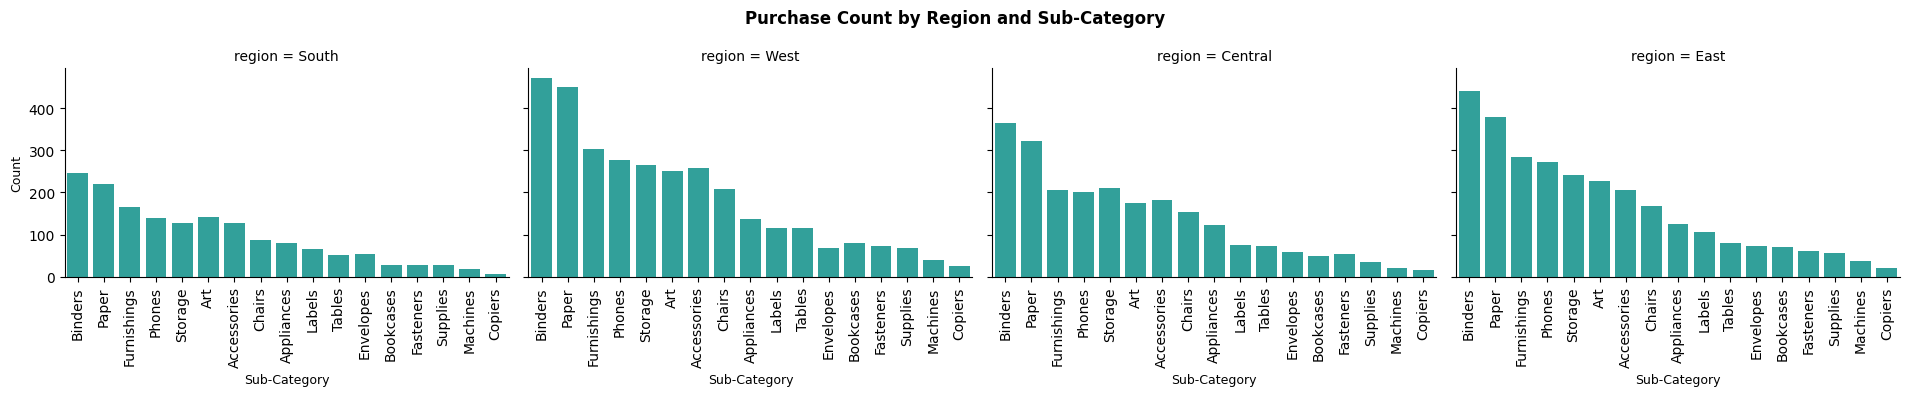

In [73]:
order = (df['sub_category'].value_counts().index)
g = sns.FacetGrid(df, col='region', height=4, aspect=1.2)
g.map(sns.countplot, 'sub_category', order=order, color= 'LightSeaGreen')
g.set_xticklabels(rotation=90)
g.set_xlabels('Sub-Category', size=9)
g.set_ylabels('Count', size=9)
plt.suptitle('Purchase Count by Region and Sub-Category', weight='bold')
plt.tight_layout()


Apriori + Data Viz => Cate/Set cate nào nên được chú trọng ở các region

In [121]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'ship_days'],
      dtype='object')

### Sales

In [170]:


coord_df = (
    df.groupby('sub_category')[['sales', 'profit']]
      .sum()
      .reset_index()
)

coord_df['sales_rank'] = coord_df['sales'].rank(ascending=False, method='dense')
coord_df['profit_rank'] = coord_df['profit'].rank(ascending=False, method='dense')


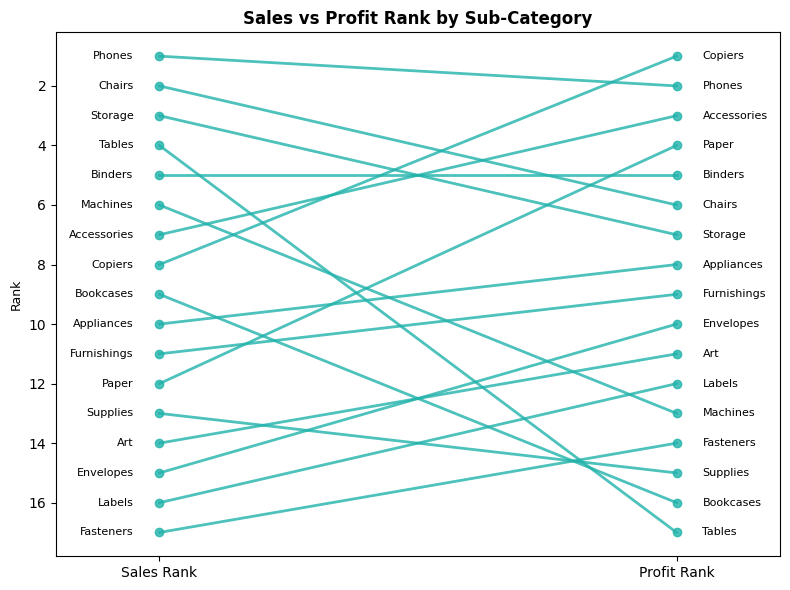

In [185]:
plt.figure(figsize=(8,6))

palette = sns.color_palette('Blues', len(coord_df))

for i, row in coord_df.iterrows():
    plt.plot(
        [0, 1],
        [row['sales_rank'], row['profit_rank']],
        marker='o',
        color='lightseagreen',
        linewidth=2,
        alpha=0.8
    )
    
    # Nhãn sub-category
    plt.text(-0.05, row['sales_rank'], row['sub_category'],
             ha='right', va='center', fontsize=8)
    plt.text(1.05, row['profit_rank'], row['sub_category'],
             ha='left', va='center', fontsize=8)

# Trục
plt.xticks([0, 1], ['Sales Rank', 'Profit Rank'])
plt.gca().invert_yaxis()   # rank 1 ở trên
plt.xlim(-0.2, 1.2)

plt.title('Sales vs Profit Rank by Sub-Category', weight='bold')
plt.ylabel('Rank', size=9)
plt.tight_layout()
plt.show()


In [186]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'ship_days'],
      dtype='object')

### Customer


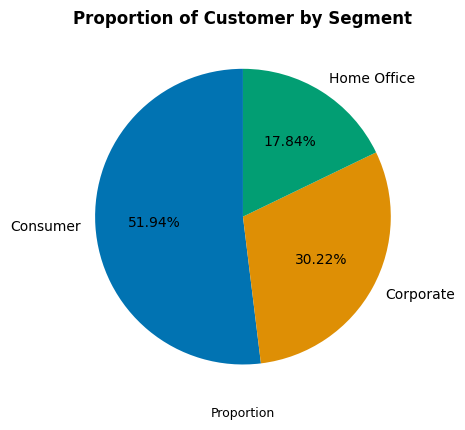

In [56]:
palette = sns.color_palette('colorblind', 3)
df_ = df['segment'].value_counts(normalize=True)
plt.pie(df_, colors=palette, startangle=90, autopct='%1.2f%%', labels=df_.index)
plt.xlabel('Region', size=9)
plt.xlabel('Proportion', size=9)
plt.grid(axis='x')
plt.title("Proportion of Customer by Segment", weight='bold')
plt.show()

Top 10% most purchased customers

In [57]:
df_ = df.copy()
df_['purchase_count'] = df_.groupby('customer_id')['order_id'].transform('nunique')

cus = df_[['customer_id','customer_name', 'segment', 'purchase_count']]
cus.drop_duplicates(inplace=True)
top_purchase = cus['purchase_count'].quantile(0.9)
top_cus = cus[cus['purchase_count']>=top_purchase]
top_cus.sort_values('purchase_count', ascending=False)


C:\Users\Asus\AppData\Local\Temp\ipykernel_19852\608568269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus.drop_duplicates(inplace=True)


,customer_id,customer_name,segment,purchase_count
536,EP-13915,Emily Phan,Consumer,17
824,PG-18820,Patrick Gardner,Consumer,13
230,EA-14035,Erin Ashbrook,Corporate,13
599,CK-12205,Chloris Kastensmidt,Consumer,13
141,SH-19975,Sally Hughsby,Corporate,13
...,...,...,...,...
924,AH-10075,Adam Hart,Corporate,10
996,RD-19585,Rob Dowd,Consumer,10
1072,FO-14305,Frank Olsen,Consumer,10
1104,NM-18520,Neoma Murray,Consumer,10


In [58]:
top_cus['segment'].value_counts()

segment
Consumer       50
Corporate      27
Home Office    11
Name: count, dtype: int64

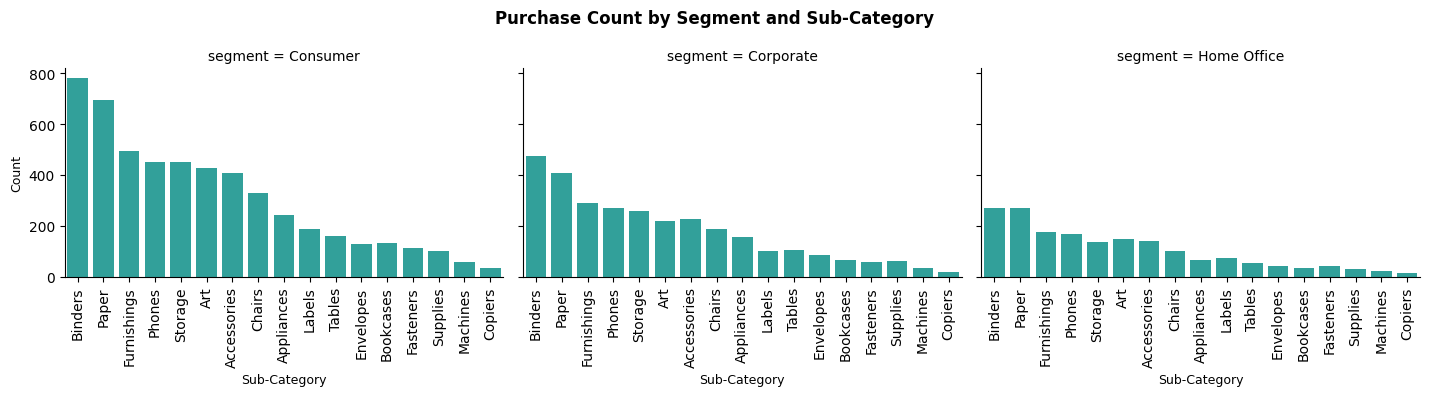

In [59]:
order = (df['sub_category'].value_counts().index)
g = sns.FacetGrid(df, col='segment', height=4, aspect=1.2)
g.map(sns.countplot, 'sub_category', order=order, color= 'LightSeaGreen')
g.set_xticklabels(rotation=90)
g.set_xlabels('Sub-Category', size=9)
g.set_ylabels('Count', size=9)
plt.suptitle('Purchase Count by Segment and Sub-Category', weight='bold')
plt.tight_layout()


In [61]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'ship_days'],
      dtype='object')

### Query

Which are top 1% most purchased products ?

In [ ]:
# query = """
# with counts as (
# select i.product_id, p.product_name, p.sub_category, count(*) as quantity
# from order_items i
# join products p on i.product_id = p.product_id
# join orders o on o.order_id = i.order_id
# join customers c on c.customer_id = o.customer_id
# group by i.product_id, p.product_name)

# select * 
# from (
#         select *,
#             percent_rank() over (order by quantity desc) as pct_rank
#         from counts) 
# where pct_rank <= 0.01
# order by quantity desc
# """

# pd.read_sql(query, conn)

NameError: name 'conn' is not defined

What are top 1% most purchased products in each region?

In [ ]:
# # WEST

# query = """
# with counts as (
# select i.product_id, p.product_name, p.sub_category, c.region, count(*) as quantity
# from order_items i
# join products p on i.product_id = p.product_id
# join orders o on o.order_id = i.order_id
# join customers c on c.customer_id = o.customer_id
# where c.region = 'West'
# group by i.product_id, p.product_name)

# select * 
# from (
#         select *,
#             percent_rank() over (order by quantity desc) as pct_rank
#         from counts) 
# where pct_rank <= 0.01
# order by quantity desc
# """
# pd.read_sql(query, conn)

,product_id,product_name,sub_category,region,quantity,pct_rank
0,FUR-FU-10004270,"Eldon Image Series Desk Accessories, Burgundy",Furnishings,West,8,0.000000
1,FUR-CH-10002647,"Situations Contoured Folding Chairs, 4/Set",Chairs,West,7,0.000656
2,OFF-BI-10001097,Avery Hole Reinforcements,Binders,West,7,0.000656
3,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,Binders,West,7,0.000656
4,OFF-FA-10002280,Advantus Plastic Paper Clips,Fasteners,West,7,0.000656
5,FUR-CH-10000595,Safco Contoured Stacking Chairs,Chairs,West,6,0.003279
6,FUR-CH-10002880,"Global High-Back Leather Tilter, Burgundy",Chairs,West,6,0.003279
7,FUR-CH-10003817,"Global Value Steno Chair, Gray",Chairs,West,6,0.003279
8,FUR-CH-10004287,SAFCO Arco Folding Chair,Chairs,West,6,0.003279
9,FUR-FU-10004973,Flat Face Poster Frame,Furnishings,West,6,0.003279


Sub-category nào – cho ai – ở đâu → có khả năng sinh lời cao?

xgboost

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




RMSE: 205.49
MAE : 62.76
R2  : 0.129


In [200]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from xgboost import XGBRegressor

In [201]:
target = 'profit'

cat_features = [
    'sub_category',
    'category',
    'segment',
    'region',
    'ship_mode'
]

num_features = [
    'quantity',
    'discount',
    'ship_days'
]

X = df[cat_features + num_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [202]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

In [203]:
model = XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

pipe = Pipeline(
    steps=[
        ('prep', preprocess),
        ('model', model)
    ]
)
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [206]:
y_pred = pipe.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2  : {r2:.3f}")

RMSE: 205.49
MAE : 62.76
R2  : 0.129


In [207]:


xgb_model = pipe.named_steps['model']

importances = xgb_model.feature_importances_

feature_names = (
    pipe.named_steps['prep']
    .get_feature_names_out()
)

fi = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    .sort_values('importance', ascending=False)
)

fi.head(15)


,feature,importance
6,cat__sub_category_Copiers,0.203029
11,cat__sub_category_Machines,0.081392
32,num__discount,0.058820
20,cat__segment_Consumer,0.049646
33,num__ship_days,0.049047
29,cat__ship_mode_Second Class,0.044262
31,num__quantity,0.042113
25,cat__region_South,0.041286
19,cat__category_Technology,0.035832
21,cat__segment_Corporate,0.033793


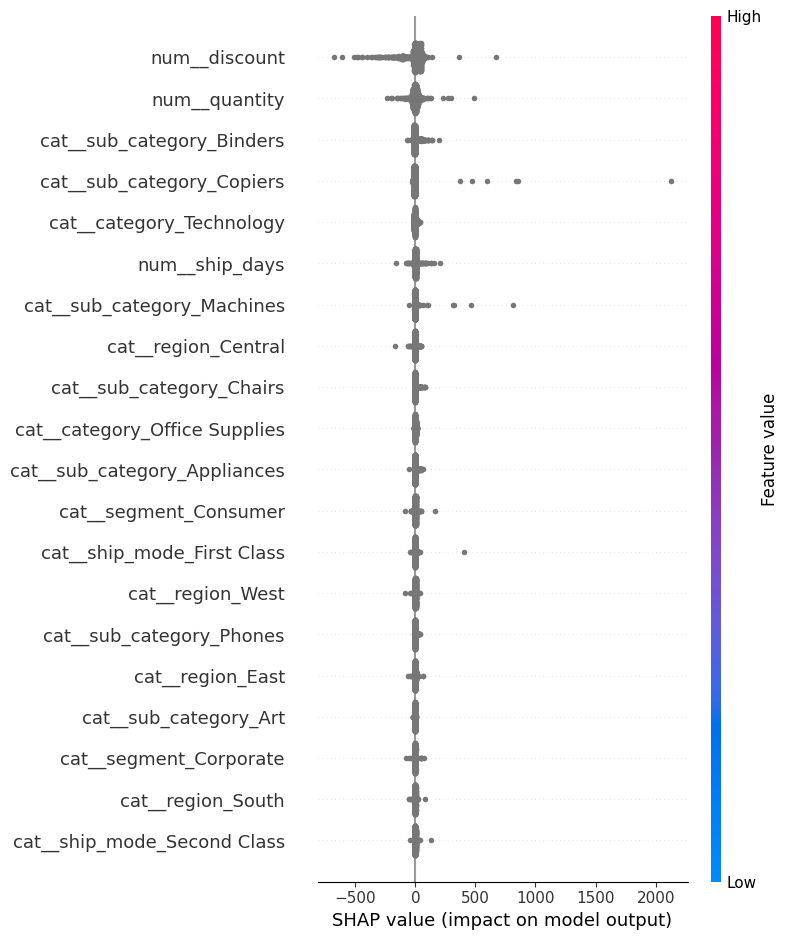

In [209]:
import shap

X_sample = X.sample(1000, random_state=42)

X_trans = pipe.named_steps['prep'].transform(X_sample)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_trans)

shap.summary_plot(
    shap_values,
    X_trans,
    feature_names=feature_names
)


random forest

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
target = 'profit'

cat_features = [
    'sub_category',
    'category',
    'segment',
    'region',
    'ship_mode'
]

num_features = [
    'quantity',
    'discount',
    'ship_days'
]

features = cat_features + num_features

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
cat_feature_indices = [
    X.columns.get_loc(col) for col in cat_features
]






In [219]:
model = CatBoostRegressor(
    iterations=500,
    depth=10,
    learning_rate=0.05,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

In [220]:
model.fit(
    X_train,
    y_train,
    cat_features=cat_feature_indices,
    eval_set=(X_test, y_test),
    use_best_model=True
)


0:	learn: 235.5205739	test: 219.7441032	best: 219.7441032 (0)	total: 62ms	remaining: 30.9s
100:	learn: 156.5241148	test: 199.3708392	best: 199.3708392 (100)	total: 7.11s	remaining: 28.1s
200:	learn: 137.4630534	test: 196.3432759	best: 196.2748015 (199)	total: 15s	remaining: 22.3s
300:	learn: 124.6322073	test: 196.9698460	best: 196.2196680 (206)	total: 24s	remaining: 15.9s
400:	learn: 118.6322387	test: 197.7263600	best: 196.2196680 (206)	total: 32.6s	remaining: 8.05s
499:	learn: 113.0874953	test: 198.4559770	best: 196.2196680 (206)	total: 44.1s	remaining: 0us

bestTest = 196.219668
bestIteration = 206

Shrink model to first 207 iterations.


In [221]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2  : {r2:.3f}")

RMSE: 196.22
MAE : 59.39
R2  : 0.206


In [222]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': model.get_feature_importance()
}).sort_values('importance', ascending=False)

fi.head(10)


,feature,importance
0,sub_category,26.788771
6,discount,25.355911
5,quantity,15.564978
3,region,8.986773
7,ship_days,7.578802
2,segment,6.853394
1,category,5.591656
4,ship_mode,3.279715
